# 3D Surface Plots With Graph Objects

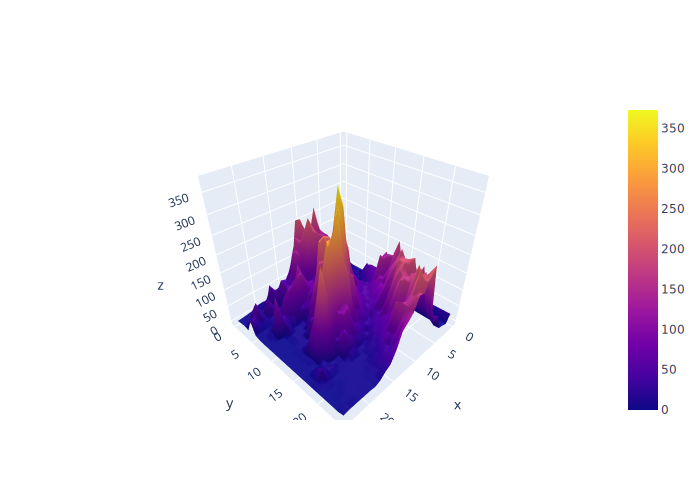

In [2]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

go.Figure(data=[go.Surface(z=z_data.values)])

## Surface Plot With Contours

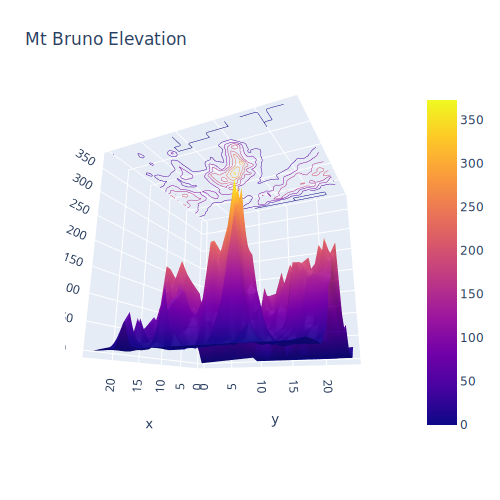

In [3]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

## Surface Contour Levels

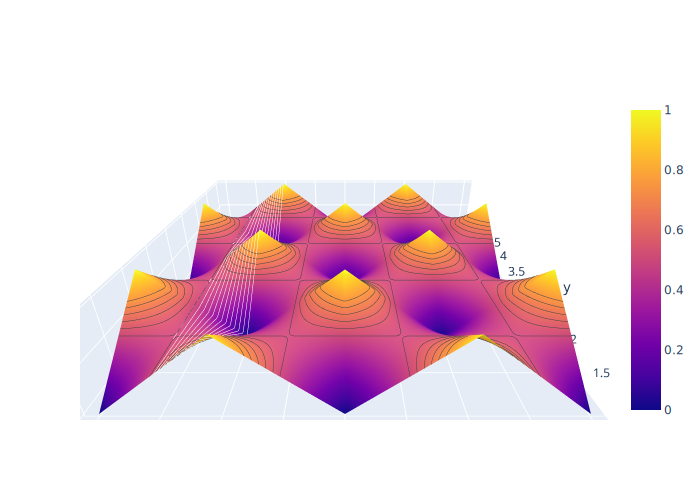

In [4]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = [1,2,3,4,5],
    y = [1,2,3,4,5],
    z = [
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]
    ]))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

## Multiple

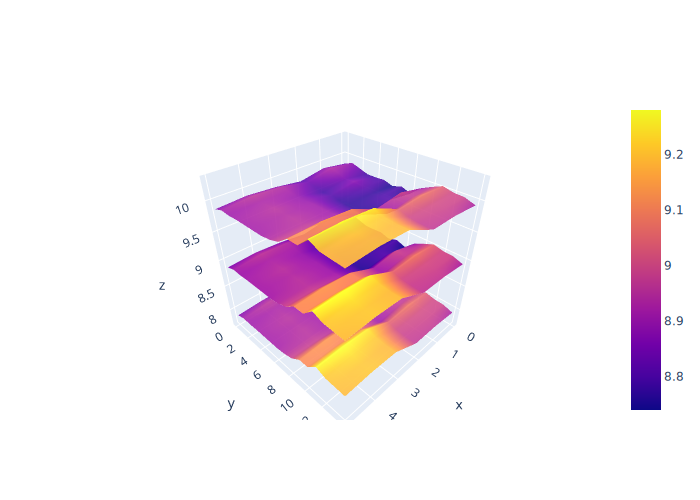

In [5]:
import plotly.graph_objects as go
import numpy as np

z1 = np.array([
    [8.83,8.89,8.81,8.87,8.9,8.87],
    [8.89,8.94,8.85,8.94,8.96,8.92],
    [8.84,8.9,8.82,8.92,8.93,8.91],
    [8.79,8.85,8.79,8.9,8.94,8.92],
    [8.79,8.88,8.81,8.9,8.95,8.92],
    [8.8,8.82,8.78,8.91,8.94,8.92],
    [8.75,8.78,8.77,8.91,8.95,8.92],
    [8.8,8.8,8.77,8.91,8.95,8.94],
    [8.74,8.81,8.76,8.93,8.98,8.99],
    [8.89,8.99,8.92,9.1,9.13,9.11],
    [8.97,8.97,8.91,9.09,9.11,9.11],
    [9.04,9.08,9.05,9.25,9.28,9.27],
    [9,9.01,9,9.2,9.23,9.2],
    [8.99,8.99,8.98,9.18,9.2,9.19],
    [8.93,8.97,8.97,9.18,9.2,9.18]
])

z2 = z1 + 1
z3 = z1 - 1

go.Figure(data=[
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9),
    go.Surface(z=z3, showscale=False, opacity=0.9)

])

## Color

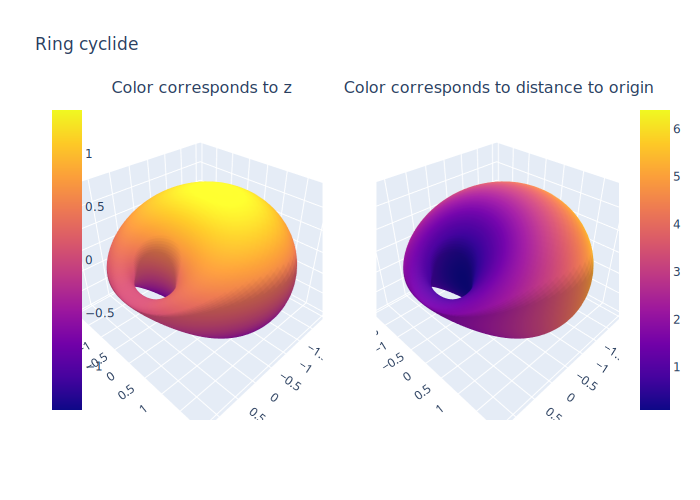

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Equation of ring cyclide
# see https://en.wikipedia.org/wiki/Dupin_cyclide
import numpy as np
a, b, d = 1.32, 1., 0.8
c = a**2 - b**2
u, v = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
x = (d * (c - a * np.cos(u) * np.cos(v)) + b**2 * np.cos(u)) / (a - c * np.cos(u) * np.cos(v))
y = b * np.sin(u) * (a - d*np.cos(v)) / (a - c * np.cos(u) * np.cos(v))
z = b * np.sin(v) * (c*np.cos(u) - d) / (a - c * np.cos(u) * np.cos(v))

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=x**2 + y**2 + z**2), 1, 2)
fig.update_layout(title_text="Ring cyclide")
fig.show()

## Subplots

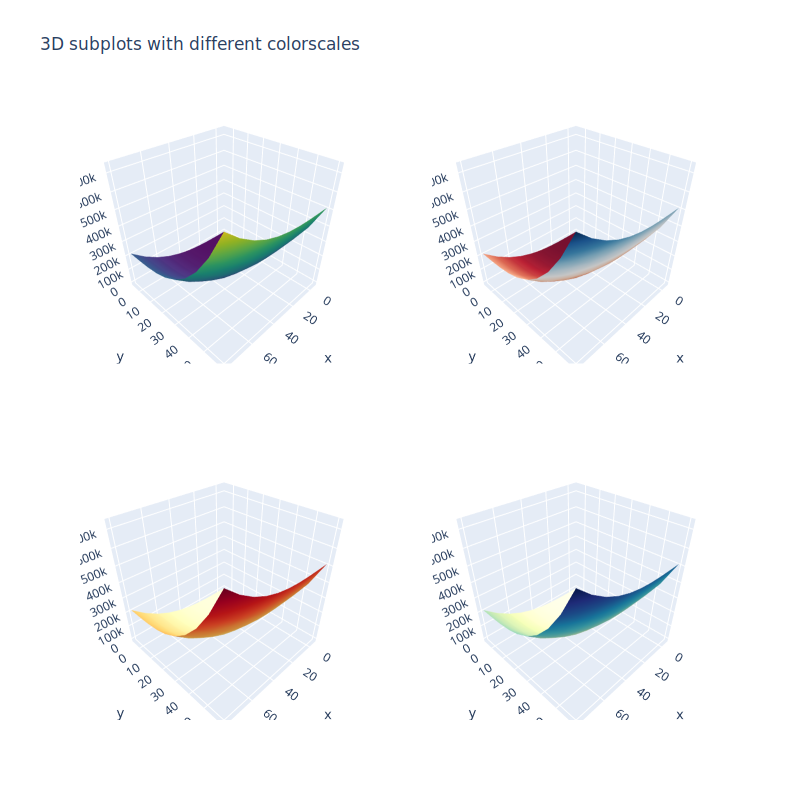

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]])

# Generate data
x = np.linspace(-5, 80, 10)
y = np.linspace(-5, 60, 10)
xGrid, yGrid = np.meshgrid(y, x)
z = xGrid ** 3 + yGrid ** 3

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='RdBu', showscale=False),
    row=1, col=2)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlOrRd', showscale=False),
    row=2, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlGnBu', showscale=False),
    row=2, col=2)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

fig.show()

## Camera: Lower viewpoint

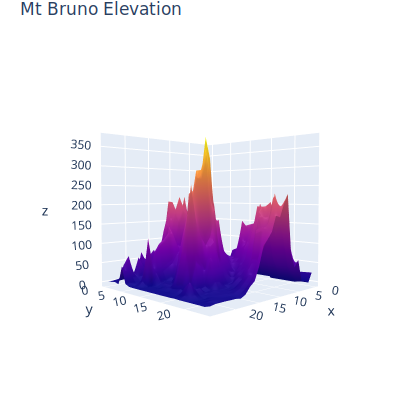

In [8]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=30, r=0, l=20, b=10)
)

camera = dict(
    eye=dict(x=2, y=2, z=0.1)
)

fig.update_layout(scene_camera=camera)
fig.show()

## View From X-Z plane

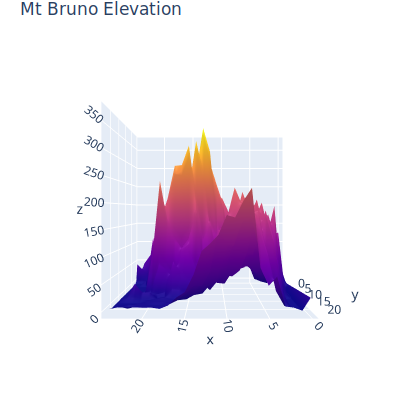

In [9]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=30, r=0, l=20, b=10)
)

camera = dict(
    eye=dict(x=0., y=2.5, z=0.)
)


fig.update_layout(scene_camera=camera)
fig.show()

## Zoom

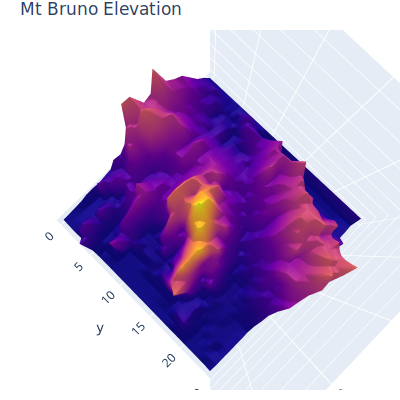

In [10]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=30, r=0, l=20, b=10)
)

camera = dict(
    eye=dict(x=0.1, y=0.1, z=1.5)
)

fig.update_layout(scene_camera=camera)
fig.show()

## Camera Tilt

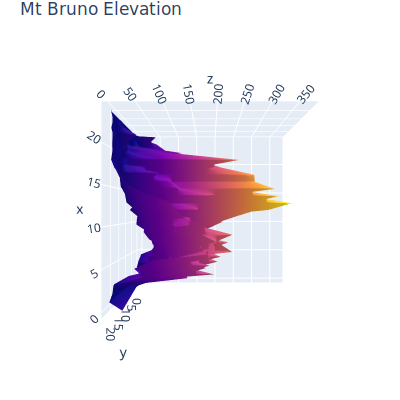

In [11]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=30, r=0, l=20, b=10)
)

camera = dict(
    up=dict(x=1, y=0., z=0),
    eye=dict(x=0., y=2.5, z=0.)
)

fig.update_layout(scene_camera=camera)
fig.show()

## Focal Point

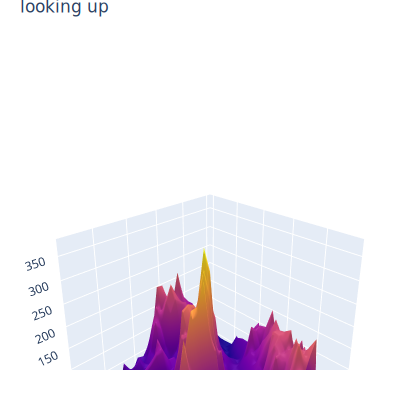

In [12]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=25, r=0, l=20, b=30)
)

name = 'looking up'
camera = dict(
    center=dict(x=0, y=0, z=0.7))


fig.update_layout(scene_camera=camera, title=name)
fig.show()